# Final Project - Iris flower classification with Decision Trees 

The iris flower dataset is perhaps the most famous dataset for classification. It contains 3 types of flowers with 4 features (Sepal Length & Width, Petal Length & Width) https://archive.ics.uci.edu/ml/datasets/iris. 

### Perform the following operations:

1. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas.
2. Plot a bar chart of the flowers. (type of flower vs number of flowers of each type)
3. Plot a pair wise plot of each feature(as shown below). Give Legends and colors for each flower. Based on these graphs, select two features for the flower classification. Which two features can you select? Make two variables, x & y. x holds the two features you selected, and y is the type of the flower. These are inputs for our SVM.
4. Split your data into training and testing data set, it should be a 80:20 split with random state 9032. 
5. Obtain decision tree model for iris data set with **only petal length and width**. Depth should be 2. Show the decision tree. Obtain confusion matrix for the predictions.
6. Plot the decision tree boundaries of the **training dataset** using the mesh grid approach. The output may be one of the two figures given below. 
![Image](./data/DT_IRIS_1.png)
![Image](./data/DT_IRIS_2.png)

### Write down the observations when step numbers 4 & 5 are performed over a depth of tree 3 & 4. The comparison should be wrt entropy, confusion matrix and decision tree plot. 

### BONUS(1.5%)
Divide the dataset into 10 groups(call them G1-G10), each containing equal number of distribution of flowers.<br><br>
Perform the following operation<br>
Take the G1-G9 as the training dataset, and G10 as the testing dataset and find the score of the model. Then take G1-G8, G10 as the training dataset and G9 as the testing dataset and get the score of the model. The keep G1-G7,G9-G10 as training dataset and G8 as the testing dataset and get the score of the model. Keep on doing this till every group is a test dataset, and rest of them are training dataset. You should have 10 scores at the end of this operation. Get these 10 scores and average of these scores. <br><br>
This method is called as *K-Fold Cross validation* where k is number of groups(10 in our case). <br>
We can use this method to ascertain that our model's score is not because of a lucky split of training & testing which gives us good score. The average of these k-folds (k-groups) gives us a good idea of the entire dataset's accuracy.  

In [1]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [4]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
df = pd.read_csv('./data/iris.data.txt', header=None, names=cols)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


1. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas.

In [6]:
flower_mapping={"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
df['bflower']=df["flower"].apply(lambda x: flower_mapping[x])
df['bflower'].head()

0    0
1    0
2    0
3    0
4    0
Name: bflower, dtype: int64

2. Plot a bar chart of the flowers. (type of flower vs number of flowers of each type)

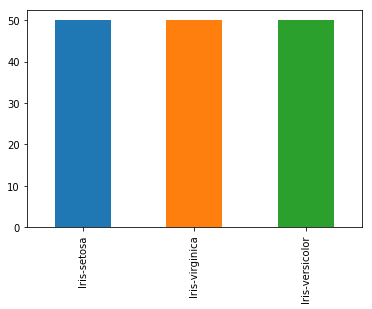

In [8]:
df["flower"].value_counts().plot(kind='bar')

3. Plot a pair wise plot of each feature(as shown below). Give Legends and colors for each flower. Based on these graphs, select two features for the flower classification. Which two features can you select? Make two variables, x & y. x holds the two features you selected, and y is the type of the flower. These are inputs for our SVM.

In [10]:
iris_setosa=df[df['bflower']==0]
iris_virginica=df[df['bflower']==1]
iris_versicolor=df[df['bflower']==2]

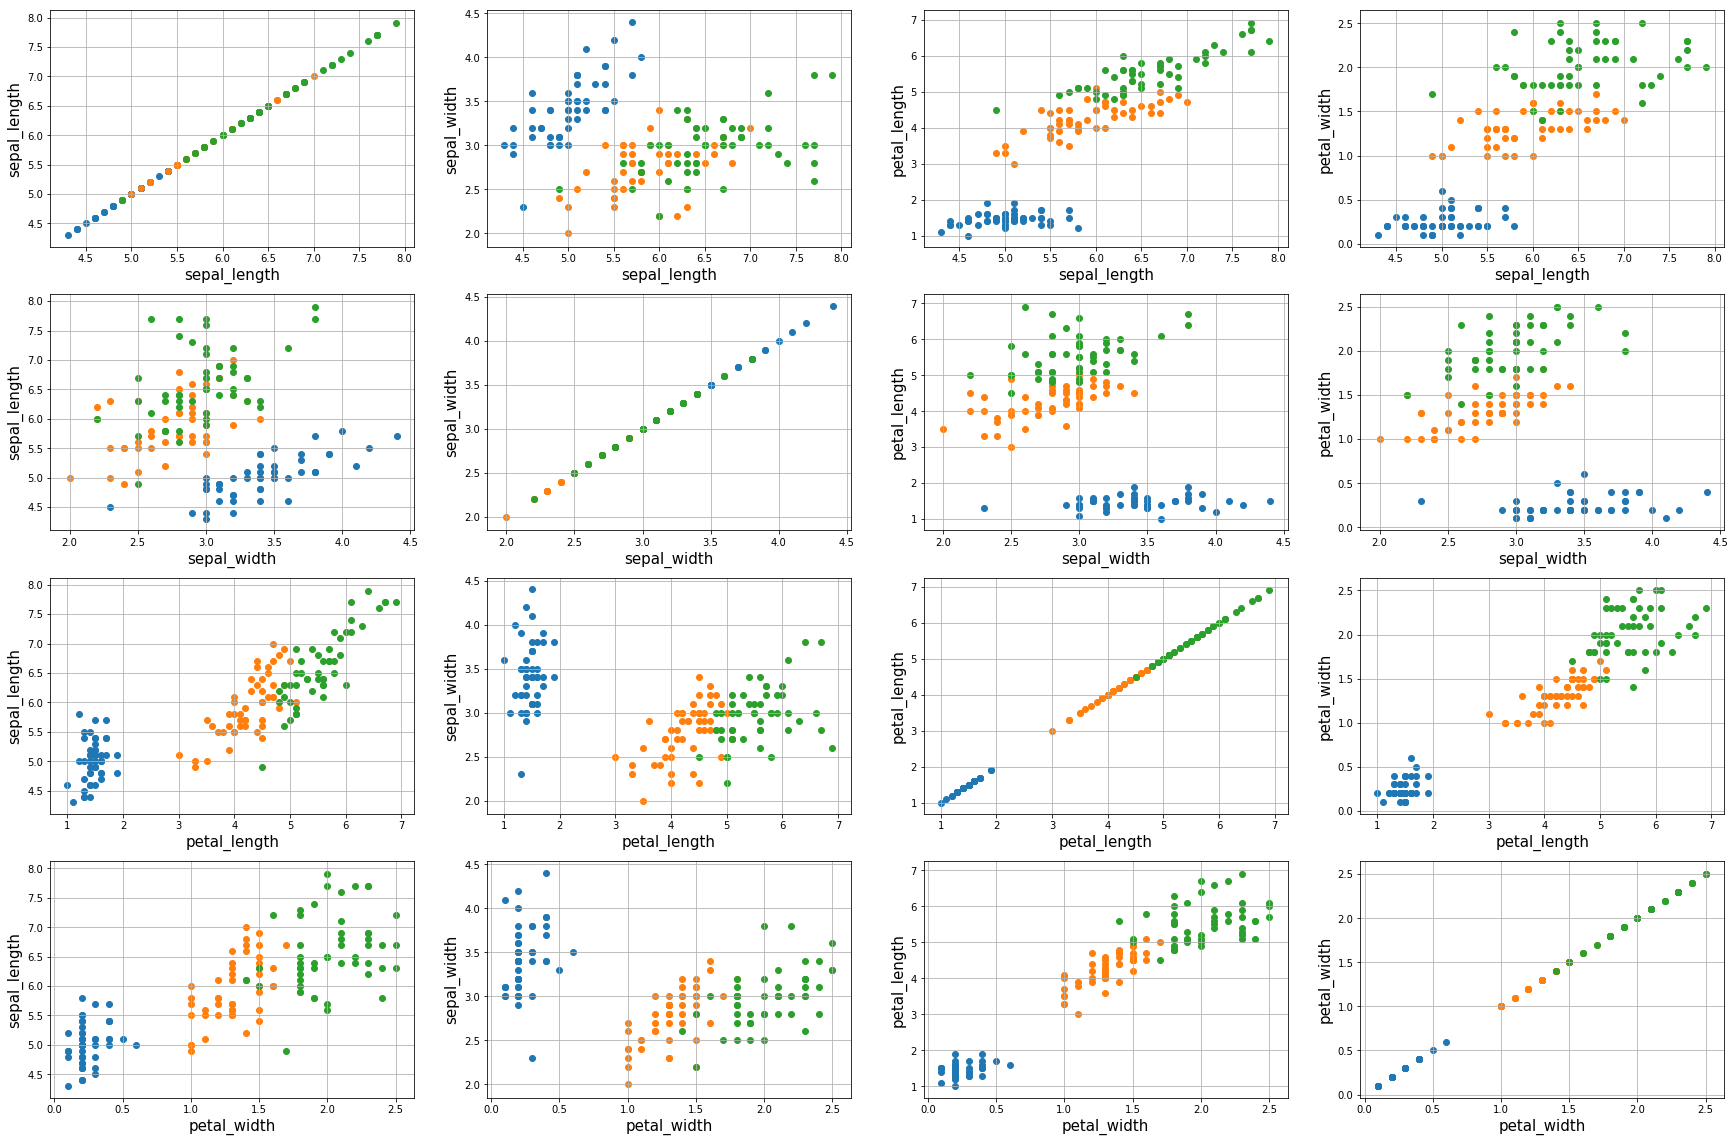

In [11]:
plt.figure(figsize=(30,20))
for i in range(0,4):
    for j in range(0,4):
        plt.subplot(4,4,i*4+j+1)
        plt.scatter(iris_setosa[cols[i]],iris_setosa[cols[j]],label='setosa')
        plt.scatter(iris_virginica[cols[i]],iris_virginica[cols[j]],label='virginica')
        plt.scatter(iris_versicolor[cols[i]],iris_versicolor[cols[j]],label='versicolor')
        plt.xlabel(cols[i],fontsize=15)
        plt.ylabel(cols[j],fontsize=15)            
        plt.grid(True)
plt.show()

In [26]:
x=df[['petal_length','petal_width']]
y=df['bflower']

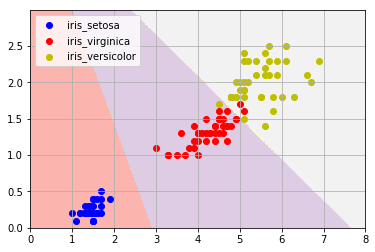

In [27]:
from sklearn.svm import SVC
SVCclassifier=SVC(kernel='linear',C=10,max_iter=100)
SVCmodel=SVCclassifier.fit(x_train,y_train)
import numpy as np
x_min,x_max=0,8
y_min,y_max=0,3
xx,yy=np.meshgrid(np.arange(x_min,x_max,.01),np.arange(y_min,y_max, .01))
#print(xx); print(yy);
xx_lin=xx.ravel()
yy_lin=yy.ravel()
pred_input=np.c_[xx_lin,yy_lin]

z=SVCmodel.predict(pred_input)
z=z.reshape(xx.shape)
#contour plot requires 2D matrix
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(x11['petal_length'],x11['petal_width'],color='b',label="iris_setosa")
plt.scatter(y11['petal_length'],y11['petal_width'],color='r',label="iris_virginica")
plt.scatter(z11['petal_length'],z11['petal_width'],color='y',label="iris_versicolor")
#plt.axis([0,3,0,7])
plt.legend()
plt.grid(True)

4. Split your data into training and testing data set, it should be a 80:20 split with random state 9032. 

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=9032,test_size=0.2)

5.Obtain decision tree model for iris data set with **only petal length and width**.Depth should be 2. Show the decision tree. Obtain confusion matrix for the predictions.

In [31]:
decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
obtained_tree = decisiontree.fit(x, y)
print('Extracted Classes', decisiontree.classes_)

Extracted Classes [0 1 2]


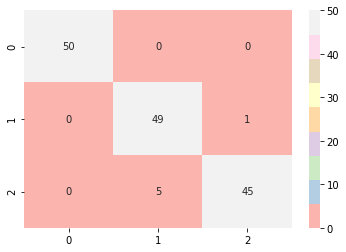

In [32]:
import seaborn as sb
Predicted_Species = obtained_tree.predict(x)
cf= confusion_matrix(y, Predicted_Species)
sb.heatmap(cf, annot=True, cmap='Pastel1', xticklabels=decisiontree.classes_, yticklabels=decisiontree.classes_)

6. Plot the decision tree boundaries of the **training dataset** using the mesh grid approach. The output may be one of the two figures given below. 

In [33]:
x11=x_train[y_train==0]
y11=x_train[y_train==1]
z11=x_train[y_train==2]

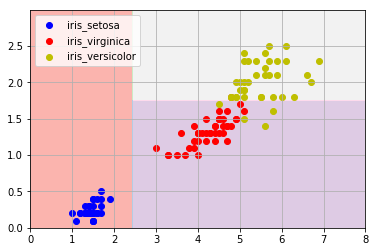

In [34]:
import numpy as np
x_min,x_max=0,8
y_min,y_max=0,3
xx,yy=np.meshgrid(np.arange(x_min,x_max,.01),np.arange(y_min,y_max, .01))
#print(xx); print(yy);
xx_lin=xx.ravel()
yy_lin=yy.ravel()
pred_input=np.c_[xx_lin,yy_lin]

z=obtained_tree .predict(pred_input)
z=z.reshape(xx.shape)
#contour plot requires 2D matrix
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(x11['petal_length'],x11['petal_width'],color='b',label="iris_setosa")
plt.scatter(y11['petal_length'],y11['petal_width'],color='r',label="iris_virginica")
plt.scatter(z11['petal_length'],z11['petal_width'],color='y',label="iris_versicolor")
#plt.axis([0,3,0,7])
plt.legend()
plt.grid(True)

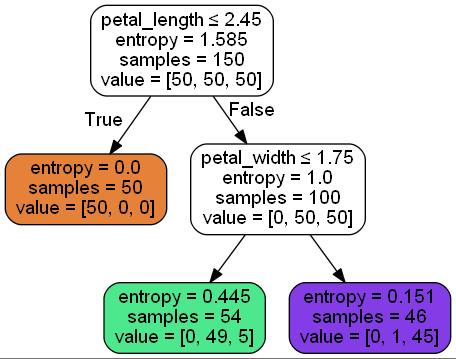

In [38]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image
DecisionTreeImg = StringIO()

export_graphviz(obtained_tree, out_file=DecisionTreeImg, filled = True, rounded = True, feature_names=["petal_length","petal_width"], special_characters=True)
graph = pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_jpg())

Extracted Classes [0 1 2]


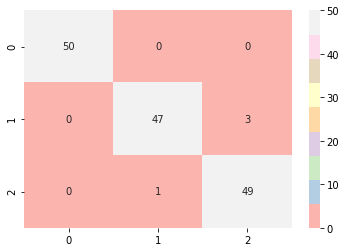

In [45]:
decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
obtained_tree = decisiontree.fit(x, y)
print('Extracted Classes', decisiontree.classes_)
import seaborn as sb
Predicted_Species = obtained_tree.predict(x)
cf= confusion_matrix(y, Predicted_Species)
sb.heatmap(cf, annot=True, cmap='Pastel1', xticklabels=decisiontree.classes_, yticklabels=decisiontree.classes_)


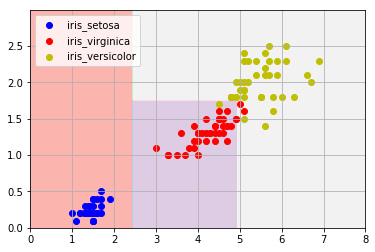

In [46]:
x11=x_train[y_train==0]
y11=x_train[y_train==1]
z11=x_train[y_train==2]
import numpy as np
x_min,x_max=0,8
y_min,y_max=0,3
xx,yy=np.meshgrid(np.arange(x_min,x_max,.01),np.arange(y_min,y_max, .01))
#print(xx); print(yy);
xx_lin=xx.ravel()
yy_lin=yy.ravel()
pred_input=np.c_[xx_lin,yy_lin]
z=obtained_tree .predict(pred_input)
z=z.reshape(xx.shape)
#contour plot requires 2D matrix
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(x11['petal_length'],x11['petal_width'],color='b',label="iris_setosa")
plt.scatter(y11['petal_length'],y11['petal_width'],color='r',label="iris_virginica")
plt.scatter(z11['petal_length'],z11['petal_width'],color='y',label="iris_versicolor")
#plt.axis([0,3,0,7])
plt.legend()
plt.grid(True)


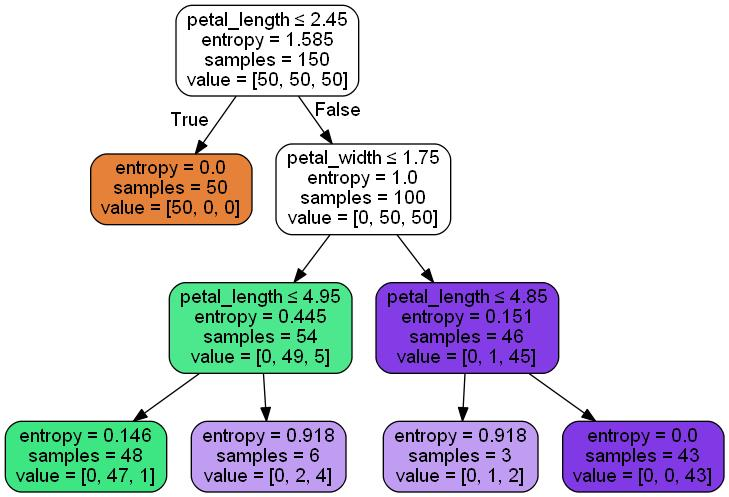

In [47]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image
DecisionTreeImg = StringIO()

export_graphviz(obtained_tree, out_file=DecisionTreeImg, filled = True, rounded = True, feature_names=["petal_length","petal_width"], special_characters=True)
graph = pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_jpg())

Extracted Classes [0 1 2]


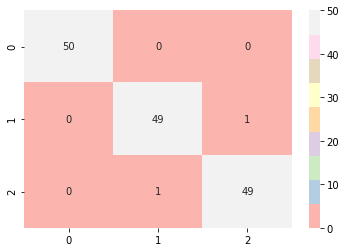

In [48]:
decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
obtained_tree = decisiontree.fit(x, y)
print('Extracted Classes', decisiontree.classes_)
import seaborn as sb
Predicted_Species = obtained_tree.predict(x)
cf= confusion_matrix(y, Predicted_Species)
sb.heatmap(cf, annot=True, cmap='Pastel1', xticklabels=decisiontree.classes_, yticklabels=decisiontree.classes_)


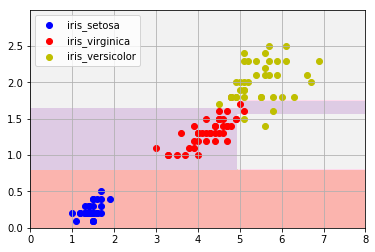

In [49]:
x11=x_train[y_train==0]
y11=x_train[y_train==1]
z11=x_train[y_train==2]
import numpy as np
x_min,x_max=0,8
y_min,y_max=0,3
xx,yy=np.meshgrid(np.arange(x_min,x_max,.01),np.arange(y_min,y_max, .01))
#print(xx); print(yy);
xx_lin=xx.ravel()
yy_lin=yy.ravel()
pred_input=np.c_[xx_lin,yy_lin]
z=obtained_tree .predict(pred_input)
z=z.reshape(xx.shape)
#contour plot requires 2D matrix
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(x11['petal_length'],x11['petal_width'],color='b',label="iris_setosa")
plt.scatter(y11['petal_length'],y11['petal_width'],color='r',label="iris_virginica")
plt.scatter(z11['petal_length'],z11['petal_width'],color='y',label="iris_versicolor")
#plt.axis([0,3,0,7])
plt.legend()
plt.grid(True)


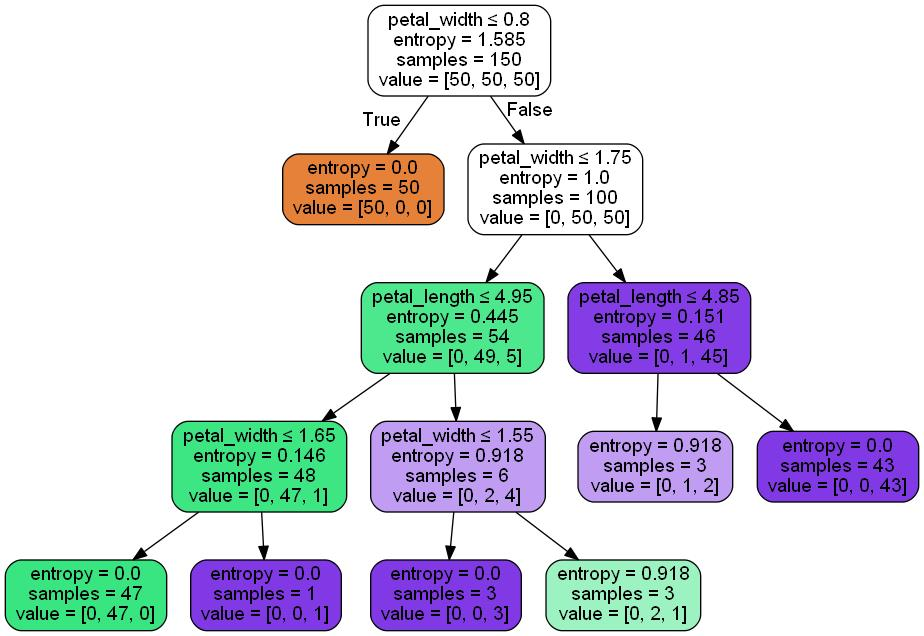

In [50]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image
DecisionTreeImg = StringIO()

export_graphviz(obtained_tree, out_file=DecisionTreeImg, filled = True, rounded = True, feature_names=["petal_length","petal_width"], special_characters=True)
graph = pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_jpg())